# Enunciado

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import py
import pycountry_convert as pc

## Preparación de datos (1.0pt)

Explore el archivo `covid19_confirmados.csv` y utilice la función `pd.read_csv` para importarlo como un `DataFrame` considerando las siguientes indicaciones:

1. Utilice el nombre de país como índice.
1. Elimine las columnas `Lat` y `Long`.
1. Use TimeStamps para las columnas asociadas a fechas.
1. Reduzca la columna `Province/State`. El DataFrame resultante debe tener los totales a nivel país.

In [2]:
df_confirmados = pd.read_csv('data/covid19_confirmados.csv',
                 parse_dates=True).drop(["Lat", "Long"], axis=1) #Eliminar columnas Lat y Long
#df_confirmados.set_index("Country/Region", inplace=True)
df_confirmados.set_index(["Country/Region", "Province/State"], inplace=True)
df_confirmados.columns = pd.to_datetime(df_confirmados.columns, format="%m/%d/%y") # Asociar fechas de columnas a timestamp
df_confirmados.reset_index()
df_confirmados = df_confirmados.groupby("Country/Region").sum()
df_confirmados.rename(index={'Congo (Brazzaville)':'Congo',
                             'Congo (Kinshasa)': 'Congo',
                             'Korea, South': 'South Korea',
                             'Taiwan*': 'Taiwan',
                             'US': 'United States'},inplace=True) # Renombrar indices
df_confirmados = df_confirmados.groupby("Country/Region").sum() # Para juntar los dos Congos
df_confirmados

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,177782,177803,177827,177897,177932,177974,177974,177974,177974,177974
Albania,0,0,0,0,0,0,0,0,0,0,...,273759,273823,273870,273913,274000,274055,274108,274136,274191,274219
Algeria,0,0,0,0,0,0,0,0,0,0,...,265679,265684,265691,265694,265699,265705,265707,265714,265720,265724
Andorra,0,0,0,0,0,0,0,0,0,0,...,40024,40024,40024,40024,40024,40024,40328,40328,40328,40328
Angola,0,0,0,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,655750,655750,655750,656287,656287,656287,656287,656287,656287,656287
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11806,11806,11806,11808,11812,11812,11812,11812,11813,11813


In [3]:
# Comprobar los nombres de los paises
for i in df_confirmados.index:
    print(i)

Afghanistan
Albania
Algeria
Andorra
Angola
Antarctica
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
MS Zaandam
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Marshall Islands
Maur

Explore el archivo `population_by_country_2020.csv` y utilice la función `pd.read_csv` de pandas para importarlo como un `DataFrame`. Utilice el nombre de país como índice principal. 

Nota: Algunos siglas o nombres podrían no calzar con el `DataFrame` anterior, explore y corrija programaticamente dichos errores.

In [4]:
df_poblacion = pd.read_csv('data/poblacion_mundial2020.csv')
df_poblacion.set_index("Country (or dependency)", inplace=True)
df_poblacion.rename(index={'Czech Republic (Czechia)':'Czechia',
                           'Saint Kitts & Nevis': 'Saint Kitts and Nevis',
                           'St. Vincent & Grenadines': 'Saint Vincent and the Grenadines',
                           'Sao Tome & Principe': 'Sao Tome and Principe'},inplace=True)
df_poblacion

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Country (or dependency),,,,,,,,,,
China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...
Montserrat,4993,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
Niue,1628,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %


In [5]:
# Comprobar los nombres de los paises
for i in df_poblacion.index:
    print(i)

China
India
United States
Indonesia
Pakistan
Brazil
Nigeria
Bangladesh
Russia
Mexico
Japan
Ethiopia
Philippines
Egypt
Vietnam
DR Congo
Turkey
Iran
Germany
Thailand
United Kingdom
France
Italy
Tanzania
South Africa
Myanmar
Kenya
South Korea
Colombia
Spain
Uganda
Argentina
Algeria
Sudan
Ukraine
Iraq
Afghanistan
Poland
Canada
Morocco
Saudi Arabia
Uzbekistan
Peru
Angola
Malaysia
Mozambique
Ghana
Yemen
Nepal
Venezuela
Madagascar
Cameroon
Côte d'Ivoire
North Korea
Australia
Niger
Taiwan
Sri Lanka
Burkina Faso
Mali
Romania
Malawi
Chile
Kazakhstan
Zambia
Guatemala
Ecuador
Syria
Netherlands
Senegal
Cambodia
Chad
Somalia
Zimbabwe
Guinea
Rwanda
Benin
Burundi
Tunisia
Bolivia
Belgium
Haiti
Cuba
South Sudan
Dominican Republic
Czechia
Greece
Jordan
Portugal
Azerbaijan
Sweden
Honduras
United Arab Emirates
Hungary
Tajikistan
Belarus
Austria
Papua New Guinea
Serbia
Israel
Switzerland
Togo
Sierra Leone
Hong Kong
Laos
Paraguay
Bulgaria
Libya
Lebanon
Nicaragua
Kyrgyzstan
El Salvador
Turkmenistan
Singapore


Realice un `merge` de los `DataFrame` anteriores. El objetivo es asignar un valor de `Population` a cada elemento del primer `DataFrame`. Indique las filas donde no se puede realizar el `merge` y luego descártelas de su `DataFrame` final.

# A continuación se listan los paises que no estarán en el dataframe final ya que no están en alguno de los dos dataframes:

In [6]:
# Indices que estan en covid19_confirmados.csv pero no en poblacion_mundial2020.csv:
for i in df_confirmados.index:
    if i not in df_poblacion.index:
        print(i)

Antarctica
Burma
Cote d'Ivoire
Diamond Princess
Kosovo
MS Zaandam
Summer Olympics 2020
West Bank and Gaza
Winter Olympics 2022


In [7]:
# Indices que estan en poblacion_mundial2020.csv pero no en covid19_confirmados.csv
for i in df_poblacion.index:
    if i not in df_confirmados.index:
        print(i)

DR Congo
Myanmar
Côte d'Ivoire
North Korea
Hong Kong
Turkmenistan
State of Palestine
Puerto Rico
Réunion
Macao
Western Sahara
Guadeloupe
Martinique
French Guiana
New Caledonia
French Polynesia
Mayotte
Channel Islands
Guam
Curaçao
Aruba
U.S. Virgin Islands
Isle of Man
Cayman Islands
Bermuda
Northern Mariana Islands
Greenland
American Samoa
Faeroe Islands
Sint Maarten
Turks and Caicos
Saint Martin
Gibraltar
British Virgin Islands
Caribbean Netherlands
Cook Islands
Anguilla
Tuvalu
Wallis & Futuna
Nauru
Saint Barthelemy
Saint Helena
Saint Pierre & Miquelon
Montserrat
Falkland Islands
Niue
Tokelau


In [8]:
df1 = df_confirmados.merge(df_poblacion, how='inner', left_on='Country/Region', right_index=True)
df1

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39074280,2.33 %,886592,60,652860,-62920.0,4.6,18,25 %,0.50 %
Albania,0,0,0,0,0,0,0,0,0,0,...,2877239,-0.11 %,-3120,105,27400,-14000.0,1.6,36,63 %,0.04 %
Algeria,0,0,0,0,0,0,0,0,0,0,...,43984569,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56 %
Andorra,0,0,0,0,0,0,0,0,0,0,...,77287,0.16 %,123,164,470,NaN,N.A.,N.A.,88 %,0.00 %
Angola,0,0,0,0,0,0,0,0,0,0,...,33032075,3.27 %,1040977,26,1246700,6413.0,5.6,17,67 %,0.42 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,28421581,-0.28 %,-79889,32,882050,-653249.0,2.3,30,N.A.,0.36 %
Vietnam,0,2,2,2,2,2,2,2,2,2,...,97490013,0.91 %,876473,314,310070,-80000.0,2.1,32,38 %,1.25 %
Yemen,0,0,0,0,0,0,0,0,0,0,...,29935468,2.28 %,664042,56,527970,-30000.0,3.8,20,38 %,0.38 %


Repita el procedimiento para los archivos `covid19_recuperados.csv` y `covid19_muertes.csv`.

In [9]:
df_recuperados = pd.read_csv('data/covid19_recuperados.csv').drop(["Lat", "Long"], axis=1)
df_recuperados.set_index(["Country/Region", "Province/State"], inplace=True)
df_recuperados.columns = pd.to_datetime(df_recuperados.columns, format="%m/%d/%y") # Asociar fechas de columnas a timestamp
df_recuperados.reset_index()
df_recuperados = df_recuperados.groupby("Country/Region").sum()
df_recuperados.rename(index={'Congo (Brazzaville)':'Congo',
                             'Congo (Kinshasa)': 'Congo',
                             'Korea, South': 'South Korea',
                             'Taiwan*': 'Taiwan',
                             'US': 'United States'},inplace=True)
df_recuperados = df_recuperados.groupby("Country/Region").sum()
df_recuperados

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df2 = df_recuperados.merge(df_poblacion, how='inner', left_on='Country/Region', right_index=True)
df2

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39074280,2.33 %,886592,60,652860,-62920.0,4.6,18,25 %,0.50 %
Albania,0,0,0,0,0,0,0,0,0,0,...,2877239,-0.11 %,-3120,105,27400,-14000.0,1.6,36,63 %,0.04 %
Algeria,0,0,0,0,0,0,0,0,0,0,...,43984569,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56 %
Andorra,0,0,0,0,0,0,0,0,0,0,...,77287,0.16 %,123,164,470,NaN,N.A.,N.A.,88 %,0.00 %
Angola,0,0,0,0,0,0,0,0,0,0,...,33032075,3.27 %,1040977,26,1246700,6413.0,5.6,17,67 %,0.42 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,28421581,-0.28 %,-79889,32,882050,-653249.0,2.3,30,N.A.,0.36 %
Vietnam,0,0,0,0,0,0,0,0,0,0,...,97490013,0.91 %,876473,314,310070,-80000.0,2.1,32,38 %,1.25 %
Yemen,0,0,0,0,0,0,0,0,0,0,...,29935468,2.28 %,664042,56,527970,-30000.0,3.8,20,38 %,0.38 %


In [11]:
df_muertes = pd.read_csv('data/covid19_muertes.csv',
                 parse_dates=True).drop(["Lat", "Long"], axis=1)
df_muertes.set_index(["Country/Region", "Province/State"], inplace=True)
df_muertes.columns = pd.to_datetime(df_muertes.columns, format="%m/%d/%y") # Asociar fechas de columnas a timestamp
df_muertes.reset_index()
df_muertes = df_muertes.groupby("Country/Region").sum()
df_muertes.rename(index={'Congo (Brazzaville)':'Congo',
                         'Congo (Kinshasa)': 'Congo',
                         'Korea, South': 'South Korea',
                         'Taiwan*': 'Taiwan',
                         'US': 'United States'},inplace=True)
df_muertes = df_muertes.groupby("Country/Region").sum()
df_muertes

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7670,7671,7671,7671,7671,7671,7671,7671,7671,7671
Albania,0,0,0,0,0,0,0,0,0,0,...,3492,3492,3492,3492,3492,3492,3492,3492,3492,3493
Algeria,0,0,0,0,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6874,6874
Andorra,0,0,0,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
Angola,0,0,0,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,5655,5655,5655,5655,5655,5655,5655,5655,5655,5655
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,2143,2143,2143,2144,2144,2144,2145,2146,2147,2147


In [12]:
df3 = df_muertes.merge(df_poblacion, how='inner', left_on='Country/Region', right_index=True)
df3

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39074280,2.33 %,886592,60,652860,-62920.0,4.6,18,25 %,0.50 %
Albania,0,0,0,0,0,0,0,0,0,0,...,2877239,-0.11 %,-3120,105,27400,-14000.0,1.6,36,63 %,0.04 %
Algeria,0,0,0,0,0,0,0,0,0,0,...,43984569,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56 %
Andorra,0,0,0,0,0,0,0,0,0,0,...,77287,0.16 %,123,164,470,NaN,N.A.,N.A.,88 %,0.00 %
Angola,0,0,0,0,0,0,0,0,0,0,...,33032075,3.27 %,1040977,26,1246700,6413.0,5.6,17,67 %,0.42 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,28421581,-0.28 %,-79889,32,882050,-653249.0,2.3,30,N.A.,0.36 %
Vietnam,0,0,0,0,0,0,0,0,0,0,...,97490013,0.91 %,876473,314,310070,-80000.0,2.1,32,38 %,1.25 %
Yemen,0,0,0,0,0,0,0,0,0,0,...,29935468,2.28 %,664042,56,527970,-30000.0,3.8,20,38 %,0.38 %


## Análisis global (1.5pt)

Escriba una función que reciba una fecha y que retorne las siguientes series: 

1. Tasa de incidencia: Casos confirmados por 100.000 dividido población total.
1. Tasa de recuperación: Casos recuperados por 100.000 dividido población total.
1. Tasa de mortalidad: Casos decesos por 100.000 dividido población total.

Ahora, considerando los siguientes dos puntos temporales:

- 22 de Enero de 2021.
- 22 de Enero de 2022.

Muestre los nombres y los valores de los 3 países con:

1. La mayor y menor tasa de incidencia, respectivamente.
1. La mayor y menor tasa de recuperación, respectivamente.
1. La mayor y menor tasa de mortalidad, respectivamente.

Muestre también la posición de Chile en el ranking.

In [13]:
# Casos confirmados por 100.000 dividido población total.
def tasa_incidencia(pais, fecha):
    return 100000*df1.at[pais, pd.Timestamp(fecha)]/df1.at[pais, 'Population (2020)']

# Casos recuperados por 100.000 dividido población total.
def tasa_recuperacion(pais, fecha):
    return 100000*df2.at[pais, pd.Timestamp(fecha)]/df2.at[pais, 'Population (2020)']

# Decesos por 100.000 dividido población total.
def tasa_mortalidad(pais, fecha):
    return 100000*df3.at[pais, pd.Timestamp(fecha)]/df3.at[pais, 'Population (2020)']

In [14]:
tasa_incidencia('China','2020-09-15')

6.591275662031913

In [15]:
tasa_recuperacion('China','2020-09-15')

5.910513681432519

In [16]:
tasa_mortalidad('China','2020-09-15')

0.3287514511104674

In [17]:
# Ranking de las 3 tasas (incidencia, recuperacion y mortalidad) para el 22 de Enero de 2021 y 2022
tasas_inc_2021 = []
tasas_inc_2022 = []
tasas_rec_2021 = []
tasas_rec_2022 = []
tasas_mor_2021 = []
tasas_mor_2022 = []

for pais in df1.index:
    tasas_inc_2021.append((pais, tasa_incidencia(pais, '2021-01-22')))
    tasas_inc_2022.append((pais, tasa_incidencia(pais, '2022-01-22')))
    
for pais in df2.index:
    tasas_rec_2021.append((pais, tasa_recuperacion(pais, '2021-01-22')))
    tasas_rec_2022.append((pais, tasa_recuperacion(pais, '2022-01-22')))
    
for pais in df3.index:
    tasas_mor_2021.append((pais, tasa_mortalidad(pais, '2021-01-22')))
    tasas_mor_2022.append((pais, tasa_mortalidad(pais, '2022-01-22')))

tasas_inc_2021 = sorted(tasas_inc_2021, key=lambda tup: tup[1], reverse=True)
tasas_inc_2022 = sorted(tasas_inc_2022, key=lambda tup: tup[1], reverse=True)
tasas_rec_2021 = sorted(tasas_rec_2021, key=lambda tup: tup[1], reverse=True)
tasas_rec_2022 = sorted(tasas_rec_2022, key=lambda tup: tup[1], reverse=True)
tasas_mor_2021 = sorted(tasas_mor_2021, key=lambda tup: tup[1], reverse=True)
tasas_mor_2022 = sorted(tasas_mor_2022, key=lambda tup: tup[1], reverse=True)

In [18]:
print("El 22 de Enero del 2021 los tres países con la mayor tasa de incidencia fueron: ")
for i in range(3):
    print("{} con {:.2f} casos confirmados por cada 100.000 habitantes".format(tasas_inc_2021[i][0], tasas_inc_2021[i][1]))

print("\nMientras que las tasas mas bajas fueron:")
for i in range(3):
    print("{} con {:.2f} casos confirmados por cada 100.000 habitantes".format(tasas_inc_2021[len(tasas_inc_2021)-i-1][0], tasas_inc_2021[len(tasas_inc_2021)-i-1][1]))
    
print("\nChile se encuentra en el lugar {} de {}, con {:.2f} casos confirmados por cada 100.000 habitantes"
      .format([y[0] for y in tasas_inc_2021].index('Chile'), len(tasas_inc_2021), tasa_incidencia('Chile','2021-01-22')))


El 22 de Enero del 2021 los tres países con la mayor tasa de incidencia fueron: 
Andorra con 12183.16 casos confirmados por cada 100.000 habitantes
Montenegro con 9152.02 casos confirmados por cada 100.000 habitantes
Czechia con 8633.36 casos confirmados por cada 100.000 habitantes

Mientras que las tasas mas bajas fueron:
Tonga con 0.00 casos confirmados por cada 100.000 habitantes
Palau con 0.00 casos confirmados por cada 100.000 habitantes
Kiribati con 0.00 casos confirmados por cada 100.000 habitantes

Chile se encuentra en el lugar 42 de 188, con 3604.49 casos confirmados por cada 100.000 habitantes


In [19]:
print("El 22 de Enero del 2022 los tres países con la mayor tasa de incidencia fueron: ")
for i in range(3):
    print("{} con {:.2f} casos confirmados por cada 100.000 habitantes".format(tasas_inc_2022[i][0], tasas_inc_2022[i][1]))

print("\nMientras que las tasas mas bajas fueron:")
for i in range(3):
    print("{} con {:.2f} casos confirmados por cada 100.000 habitantes".format(tasas_inc_2022[len(tasas_inc_2022)-i-1][0], tasas_inc_2022[len(tasas_inc_2022)-i-1][1]))
    
print("\nChile se encuentra en el lugar {} de {}, con {:.2f} casos confirmados por cada 100.000 habitantes"
      .format([y[0] for y in tasas_inc_2022].index('Chile'), len(tasas_inc_2022), tasa_incidencia('Chile','2022-01-22')))

El 22 de Enero del 2022 los tres países con la mayor tasa de incidencia fueron: 
Andorra con 42730.34 casos confirmados por cada 100.000 habitantes
Seychelles con 34907.01 casos confirmados por cada 100.000 habitantes
San Marino con 33779.17 casos confirmados por cada 100.000 habitantes

Mientras que las tasas mas bajas fueron:
Micronesia con 0.87 casos confirmados por cada 100.000 habitantes
Tonga con 0.94 casos confirmados por cada 100.000 habitantes
Vanuatu con 2.27 casos confirmados por cada 100.000 habitantes

Chile se encuentra en el lugar 62 de 188, con 10183.94 casos confirmados por cada 100.000 habitantes


In [20]:
print("El 22 de Enero del 2021 los tres países con la mayor tasa de recuperación fueron: ")
for i in range(3):
    print("{} con {:.2f} casos recuperados por cada 100.000 habitantes".format(tasas_rec_2021[i][0], tasas_rec_2021[i][1]))

print("\nMientras que las tasas mas bajas fueron:")
for i in range(3):
    print("{} con {:.2f} casos recuperados por cada 100.000 habitantes".format(tasas_rec_2021[len(tasas_rec_2021)-i-1][0], tasas_rec_2021[len(tasas_rec_2021)-i-1][1]))
    
print("\nChile se encuentra en el lugar {} de {}, con {:.2f} casos recuperados por cada 100.000 habitantes"
      .format([y[0] for y in tasas_rec_2021].index('Chile'), len(tasas_rec_2021), tasa_recuperacion('Chile','2021-01-22')))

El 22 de Enero del 2021 los tres países con la mayor tasa de recuperación fueron: 
Andorra con 11045.84 casos recuperados por cada 100.000 habitantes
Montenegro con 7733.25 casos recuperados por cada 100.000 habitantes
San Marino con 7650.84 casos recuperados por cada 100.000 habitantes

Mientras que las tasas mas bajas fueron:
United States con 0.00 casos recuperados por cada 100.000 habitantes
Tonga con 0.00 casos recuperados por cada 100.000 habitantes
Sweden con 0.00 casos recuperados por cada 100.000 habitantes

Chile se encuentra en el lugar 24 de 188, con 3369.28 casos recuperados por cada 100.000 habitantes


In [21]:
print("El 22 de Enero del 2022 los tres países con la mayor tasa de recuperación fueron: ")
for i in range(3):
    print("{} con {:.2f} casos recuperados por cada 100.000 habitantes".format(tasas_rec_2022[i][0], tasas_rec_2022[i][1]))

print("\nMientras que las tasas mas bajas fueron:")
for i in range(3):
    print("{} con {:.2f} casos recuperados por cada 100.000 habitantes".format(tasas_rec_2022[len(tasas_rec_2022)-i-1][0], tasas_rec_2022[len(tasas_rec_2022)-i-1][1]))
    
print("\nChile se encuentra en el lugar {} de {}, con {:.2f} casos recuperados por cada 100.000 habitantes"
      .format([y[0] for y in tasas_rec_2022].index('Chile'), len(tasas_rec_2022), tasa_recuperacion('Chile','2022-01-22')))

El 22 de Enero del 2022 los tres países con la mayor tasa de recuperación fueron: 
Afghanistan con 0.00 casos recuperados por cada 100.000 habitantes
Albania con 0.00 casos recuperados por cada 100.000 habitantes
Algeria con 0.00 casos recuperados por cada 100.000 habitantes

Mientras que las tasas mas bajas fueron:
Zimbabwe con 0.00 casos recuperados por cada 100.000 habitantes
Zambia con 0.00 casos recuperados por cada 100.000 habitantes
Yemen con 0.00 casos recuperados por cada 100.000 habitantes

Chile se encuentra en el lugar 34 de 188, con 0.00 casos recuperados por cada 100.000 habitantes


In [22]:
print("El 22 de Enero del 2021 los tres países con la mayor tasa de mortalidad fueron: ")
for i in range(3):
    print("{} con {:.2f} decesos por cada 100.000 habitantes".format(tasas_mor_2021[i][0], tasas_mor_2021[i][1]))

print("\nMientras que las tasas mas bajas fueron:")
for i in range(3):
    print("{} con {:.2f} decesos por cada 100.000 habitantes".format(tasas_mor_2021[len(tasas_mor_2021)-i-1][0], tasas_mor_2021[len(tasas_mor_2021)-i-1][1]))
    
print("\nChile se encuentra en el lugar {} de {}, con {:.2f} decesos por cada 100.000 habitantes"
      .format([y[0] for y in tasas_mor_2021].index('Chile'), len(tasas_mor_2021), tasa_mortalidad('Chile','2021-01-22')))

El 22 de Enero del 2021 los tres países con la mayor tasa de mortalidad fueron: 
Peru con 299.44 decesos por cada 100.000 habitantes
San Marino con 191.49 decesos por cada 100.000 habitantes
Belgium con 178.26 decesos por cada 100.000 habitantes

Mientras que las tasas mas bajas fueron:
Vanuatu con 0.00 decesos por cada 100.000 habitantes
Tonga con 0.00 decesos por cada 100.000 habitantes
Timor-Leste con 0.00 decesos por cada 100.000 habitantes

Chile se encuentra en el lugar 28 de 188, con 92.90 decesos por cada 100.000 habitantes


In [23]:
print("El 22 de Enero del 2022 los tres países con la mayor tasa de mortalidad fueron: ")
for i in range(3):
    print("{} con {:.2f} decesos por cada 100.000 habitantes".format(tasas_mor_2022[i][0], tasas_mor_2022[i][1]))

print("\nMientras que las tasas mas bajas fueron:")
for i in range(3):
    print("{} con {:.2f} decesos por cada 100.000 habitantes".format(tasas_mor_2022[len(tasas_mor_2021)-i-1][0], tasas_mor_2022[len(tasas_mor_2022)-i-1][1]))
    
print("\nChile se encuentra en el lugar {} de {}, con {:.2f} decesos por cada 100.000 habitantes"
      .format([y[0] for y in tasas_mor_2022].index('Chile'), len(tasas_mor_2022), tasa_mortalidad('Chile','2022-01-22')))

El 22 de Enero del 2022 los tres países con la mayor tasa de mortalidad fueron: 
Peru con 617.67 decesos por cada 100.000 habitantes
Bulgaria con 470.33 decesos por cada 100.000 habitantes
Bosnia and Herzegovina con 426.71 decesos por cada 100.000 habitantes

Mientras que las tasas mas bajas fueron:
Tonga con 0.00 decesos por cada 100.000 habitantes
Solomon Islands con 0.00 decesos por cada 100.000 habitantes
Samoa con 0.00 decesos por cada 100.000 habitantes

Chile se encuentra en el lugar 33 de 188, con 206.31 decesos por cada 100.000 habitantes


Ahora realice las siguientes gráficas de nube de punto

- Tasa de incidencia Enero 2021 versus Tasa de incidencia Enero 2022.
- Tasa de mortalidad Enero 2021 versus Tasa de incidencia Enero 2022.

En cada una:

- Utilice color para demarcar el [continente](https://www.kaggle.com/datasets/statchaitya/country-to-continent) de cada país.
- Realice una anotación con el código del pais cercano a su punto: https://country-code.cl/es/.
- Utilice un tamaño relativamente más grande para Chile.
- Considere las buenas prácticas vistas en clases.

In [50]:
#ordenar alfabeticamente
tasas_inc_2021 = sorted(tasas_inc_2021, key=lambda tup: tup[0])
tasas_inc_2022 = sorted(tasas_inc_2022, key=lambda tup: tup[0])
tasas_rec_2021 = sorted(tasas_rec_2021, key=lambda tup: tup[0])
tasas_rec_2022 = sorted(tasas_rec_2022, key=lambda tup: tup[0])
tasas_mor_2021 = sorted(tasas_mor_2021, key=lambda tup: tup[0])
tasas_mor_2022 = sorted(tasas_mor_2022, key=lambda tup: tup[0])

In [ ]:
#Lista con codigo de pais y continente
paises = []

for i, j in enumerate(tasas_inc_2021):
    j[0]

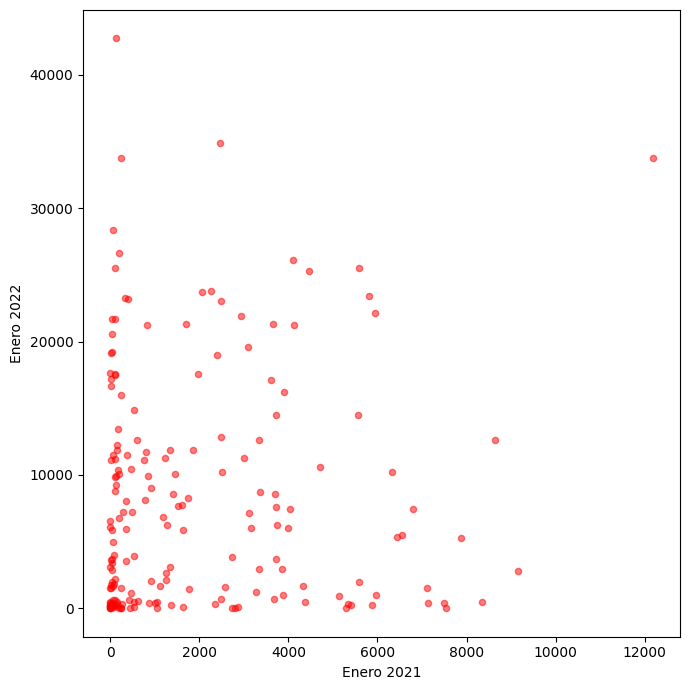

In [46]:
fig, ax = plt.subplots(figsize=(7, 7), tight_layout=True)

ax.scatter(x=[v[1] for i, v in enumerate(tasas_inc_2021)], # Posición horizontal de los puntos
           y=[v[1] for i, v in enumerate(tasas_inc_2022)], # Posición vertical de los puntos
           marker='o', # forma de los puntos
           s=20, # Tamaño de los puntos
           c='r', # Color de los puntos
           alpha=0.5) # Opacidad de los puntos

ax.set_xlabel('Enero 2021')
ax.set_ylabel('Enero 2022');

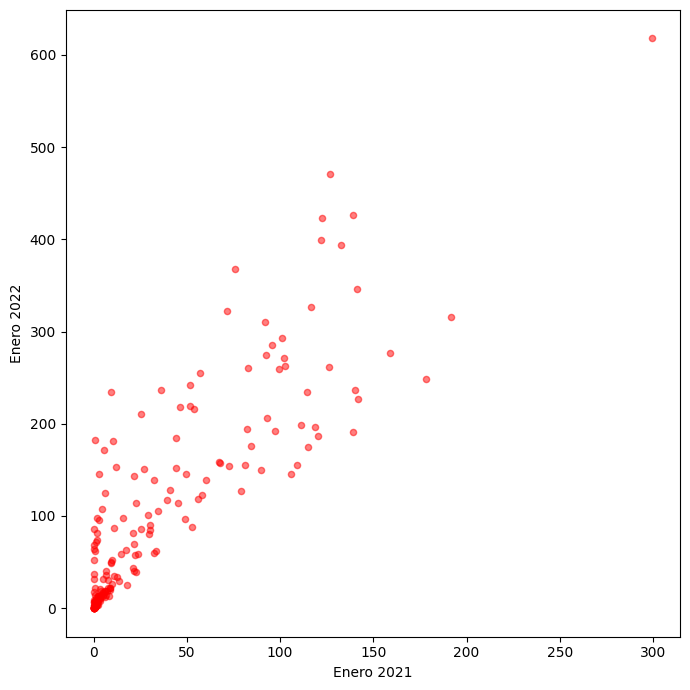

In [51]:
fig, ax = plt.subplots(figsize=(7, 7), tight_layout=True)

ax.scatter(x=[v[1] for i, v in enumerate(tasas_mor_2021)], # Posición horizontal de los puntos
           y=[v[1] for i, v in enumerate(tasas_mor_2022)], # Posición vertical de los puntos
           marker='o', # forma de los puntos
           s=20, # Tamaño de los puntos
           c='r', # Color de los puntos
           alpha=0.5) # Opacidad de los puntos

ax.set_xlabel('Enero 2021')
ax.set_ylabel('Enero 2022');

En base a los rankings y gráficas de nube de punto analice y discuta sobre el caso de Chile considerando las siguientes preguntas guía:

- ¿A qué países del mundo se parece más?
- ¿A qué países de América Latina se parece más?
- ¿A qué países de la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos) se parece más? 


## Análisis comparativo (1.5pt)

Construya una interfaz gráfica usando `ipywidgets` y `matplotlib` que permita realizar comparaciones entre las series de tiempo de COVID-19 de dos países seleccionados arbitrariamente. A modo de simplificación considere sólo los países de la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos). 

Requerimientos:

1. La interfaz debe incluir controles para escoger dos países a partir de una lista.
1. La interfaz debe incluir tres [tabs](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Tabs), el primero debe mostrar las series de tiempo de ambos países de los casos confirmados, el segundo la de recuperados y el tercero la de los decesos, respectivamente. Use una leyenda para indicar el nombre de los países.
1. La interfaz debe tener un control que permita escoger entre casos acumulados y casos nuevos. Hint: Para los casos nuevos pueden revisar la función [`diff`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.diff.html).
1. La interfaz debe tener un control que permita escoger entre valores absolutos y valores relativos (tasas por 100.000 habitantes).
1. La interfaz debe tener un control que permita escoger entre valores diarios y valores semanales. Para esto último se recomienda usar `groupby` con una [frecuencia lunes a lunes](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets).
    



## Dashboard interactivo (1.0pt)

Implemente un *dashboard web* interactivo a partir de la interfaz desarrollada en el punto anterior utilizando la librería [voila](https://github.com/voila-dashboards/voila). Sirva su interfaz en la nube, para esto puede considerar los servicios gratuitos [binder](https://mybinder.org/) o [heroku](https://www.heroku.com/free). Revise la documentación de voila [con respecto a *deployment* en la nube](https://voila.readthedocs.io/en/stable/deploy.html) y este repositorio con [un ejemplo en base a heroku](https://github.com/voila-dashboards/voila-heroku). 

Escriba el link de su dashboard web a continuación:

## Discusión final (1.0pt)

En base a su interfaz:   

1. Describa en detalle la situación de Chile con respecto a la evolución temporal de las series de tiempo. Destaque patrones y comportamientos que considere relevantes. Compare lo que observa en las distintas series de tiempo. 
1. Considerando la evolución a nivel de semana, conteste ¿En qué fechas ocurre un aumento o disminución notoria de los casos? ¿En qué fechas hay máximos y mínimos?
1. Considerando métricas que sean relativas compare el caso de Chile contra cinco países de la OCDE seleccionados por ustedes. Destaque semejanzas y diferencias considerando las cantidades y los posibles desfases temporales existentes.